# This example shows how to compute the confined modes of a quantum dot system
### Import the necessary libraries

In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")


# import numpy and pyqula
import numpy as np
import matplotlib.pyplot as plt
from pyqula import geometry

### Create the geometry of a square lattice model, and its first neighbor Hamiltonian
$$ H = \sum_{\langle ij \rangle} c^\dagger_i c_j $$
where $\langle ij \rangle $ denotes first neighbors in the square lattice

In [2]:
g = geometry.square_lattice() # create the geometry
g = g.get_supercell(12) # create a supercell
g.dimensionality = 0 # set the system zero dimensional
h = g.get_hamiltonian() # create hamiltonian of the system

### Diagonalize the Hamiltonian
The following function will obtain the eigenvalues $\epsilon_n$ defined as
$$ H \left | \Psi_n \right \rangle = \epsilon_n \left | \Psi_n \right \rangle $$

In [3]:
(inds,energies) = h.get_bands() # get the eigenenergies
es8 = np.unique(np.round(energies,6))[0:8] # lowest different 8 energies

### Given those eigenenergies, compute the local density of states
The local density of states at frequency $\omega$ is defined as
$$\rho (r) =  \text{Im} \left ( \left \langle r \right | (\omega - H +i\delta)^{-1} \left | r \right \rangle \right ) $$

In [4]:
ldos_array = [h.get_ldos(e=ei) for ei in es8] # compute LDOS for the lowest 8 energies

### Plot the local density of states in real space

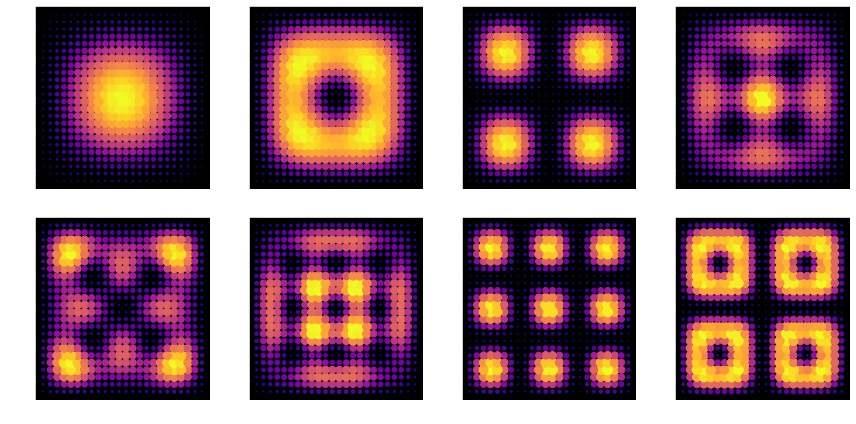

In [5]:
fig = plt.figure(figsize=(12, 6)) # set the right ratio
plt.style.use('dark_background') # use the dark mode
ip = 1
for l in ldos_array: # loop over DOS
    plt.subplot(2,4,ip) # create an individual subplot
    x,y,d = l[0],l[1],l[2]/max(l[2]) # x position, yposition and LDOS
    plt.scatter(x,y,s=d*100,c=d,cmap="plasma")
    ip += 1

plt.tight_layout()
plt.show()

